<Center>

# **`E-COMMERCE PRODUCT DELIVERY PREDICTION`**

</Center>

# **IMPORTING LIBRARIES**

In [60]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as pts
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from skimpy import skim

# Data preprocessing and Feature Selection
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE # (Feature Selection)
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Model Tuning( Hyperparameter Optimization)
import optuna
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Machine Learning Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Evaluation Metrics
from  sklearn.metrics import f1_score,accuracy_score, classification_report,confusion_matrix

# **LOAD DATA**

In [61]:
df = pd.read_csv('C:/Users/Sandeep Sarkar/Desktop/BIA Project/E_Commerce.csv')
df.head(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [62]:
# --> Renaim F into E

df.loc[df['Warehouse_block'] == 'F','Warehouse_block'] = 'E'

In [63]:
df.head(5)

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               E           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

# **EXPLORATORY DATA ANALYSIS**

In [64]:
# Data Summary
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10999  │ │ int32       │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ ID                     │   0 │     0 │     5500 │    3175 │     1 │  2750 │  5500 │  8250 │ 11000 │ ▇▇▇▇▇▇ │  │
│ │ Customer_care_calls    │   0 │     0 │    4.054 │   1.141 │     2 │     3 │     4 │     5 │     7 │ ▁▇▇▅▂▁ │  │
│ │ Customer_rating        │   0 │     0 │    2.991 │   1.414 │     1 │     2 │     3 │     4 │     5 │ ▇▇ ▇▇▇ │  │
│ │ Cost_of_the_Product    │   0 │     0 │    210.2 │   48.06 │    96 │   169 │   214 │   251 │   310 │ ▁▆▆▆▇▂ │  │
│ │ Prior_purchases        │   0 │     0 │    3.568 │   1.523 │     2 │     3 │     3 │     4 │    10 │  ▇▃▂▁  │  │
│ │ Discount_offered       │   0 │     0 │    13.37 │   16.21 │     1 │     4 │     7 │    10 │    65 │ ▇▁  ▁▁ │  │
│ │ Weight_in_gms          │   0 │     0 │     3634 │    1635 │  1001 │  1840 │  4149 │  5050 │  7846 │ ▇▂▅▇▃  │  │
│ │ Reached.on.Time_Y.N    │   0 │     0 │   0.5967 │  0.4906 │     0 │     0 │     1 │     1 │     1 │ ▅    ▇ │  │
│ └────────────────────────┴─────┴───────┴──────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Warehouse_block                    │      0 │         0 │                         1 │                10999 │  │
│ │ Mode_of_Shipment                   │      0 │         0 │                         1 │                10999 │  │
│ │ Product_importance                 │      0 │         0 │                         1 │                10999 │  │
│ │ Gender                             │      0 │         0 │                         1 │                10999 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [65]:
# Checking Null Values

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [66]:
# Checking Duplicated Values

df.duplicated().sum()

0

# **CATEGORICAL FEATURE ANALYSIS**


**One by One Analyze the distribution of Each Categorical variable**

In [67]:
# Visualizing Warehouse_blocks:-

# Getting Labels and Values for Warehouse Blocks
label= df['Warehouse_block'].value_counts().index
value= df['Warehouse_block'].value_counts().values

# Setting Color Scheme for the Pie Chart
colors= px.colors.sequential.Plasma

# Creating the Pie Chart Figure with Custom Settings
fig = go.Figure(data=[go.Pie(labels=label, values = value,textinfo= 'label+percent',marker=dict(colors=colors),hole=0.5)])

# Updating Layout for Chart Title and Size
fig.update_layout(title='Visualising Warehouse Blocks',width=550, height=400) 

# Displaying the Pie Chart
fig.show()


In [68]:
# Visualizing Product_Importance:-

label= df['Product_importance'].value_counts().index
value= df['Product_importance'].value_counts().values

colors= px.colors.sequential.Plasma

fig = go.Figure(data=[go.Pie(labels=label, values = value,textinfo= 'label+percent',marker=dict(colors=colors),hole=0.5,)])
fig.update_layout(title='Visualising Product importance',width=550, height=400) 
fig.show()

In [69]:
# Visualizing Gender:-

label= df['Gender'].value_counts().index
value= df['Gender'].value_counts().values

colors= px.colors.sequential.Plasma

fig = go.Figure(data=[go.Pie(labels=label, values = value,textinfo= 'label+percent',marker=dict(colors=colors),hole=0.5,)])
fig.update_layout(title='Gender Distribution',width=550, height=400) 
fig.show()

In [70]:
# Visualizing Mode_of_Shipment:-

label= df['Mode_of_Shipment'].value_counts().index
value= df['Mode_of_Shipment'].value_counts().values

colors= px.colors.sequential.Plasma

fig = go.Figure(data=[go.Pie(labels=label, values = value,textinfo= 'label+percent',marker=dict(colors=colors),hole=0.5)])
fig.update_layout(title = 'Visualising Mode of Shipment',width=550, height=400) 
fig.show()


In [71]:
# Visualizing Customer_rating 

label= df['Customer_rating'].value_counts().index
value= df['Customer_rating'].value_counts().values

color= px.colors.sequential.Plasma

fig = go.Figure(data=[go.Pie(labels=label, values = value,textinfo= 'label+percent',marker=dict(colors=color),hole=0.5)])
fig.update_layout(title='Visualising Customer Rating',width=550, height=400) 
fig.show()

# **Visualising Target Variable**

In [72]:
# Visualizing Product Reached.on.Time_Yes/No

label= df['Reached.on.Time_Y.N'].value_counts().index
value = df['Reached.on.Time_Y.N'].value_counts().values

colors = px.colors.sequential.Plasma

fig = go.Figure(data=[go.Pie(labels=label,values=value,textinfo='label+percent',marker=dict(colors=colors),hole=0.5)])
fig.update_layout(title='Visualising Distribution of Product Reached.on.Time_Y/N',width=550,height=400)

fig.show()

# Where 1 indicates Not Reached on time & 0 indicate Reached on Time.


`*` **Where 1= Not Reached on time & 0= indicate Reached on Time.**

---

`*` **We can see that most of our shipments is not on time (on time: 4436, not on time: 6563). In mode of shipment, ship is dominating that category so we can interpret this probably most of our not on time shipment is coming from "ship" because they are slower than other methods.**

# **NUMERICAL FEATURE ANALYSIS**

**Analyze the distribution of Each Numerical variable**

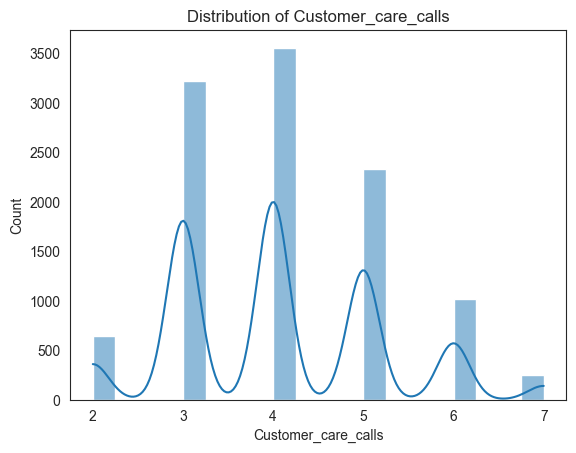

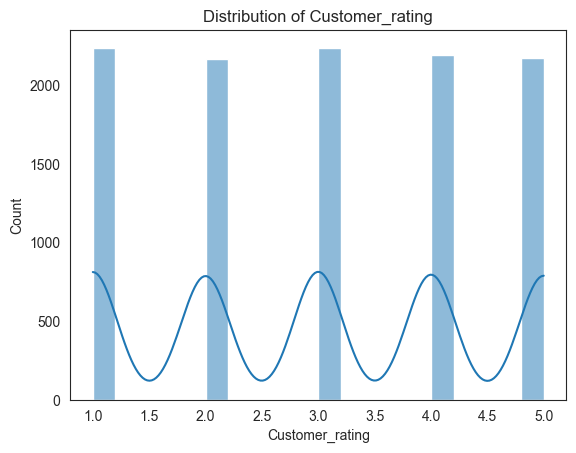

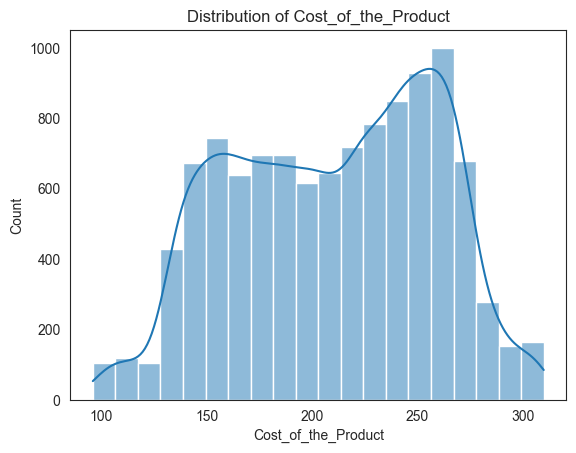

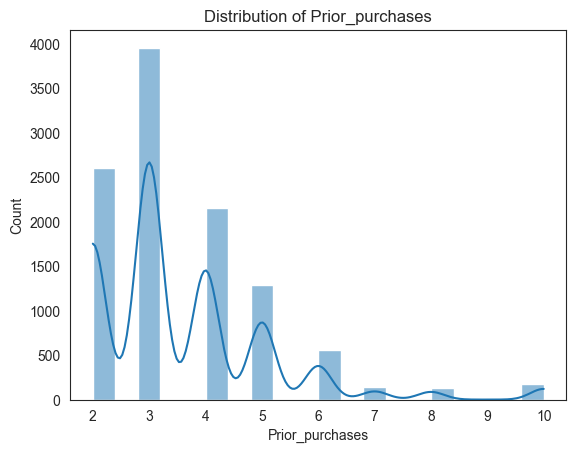

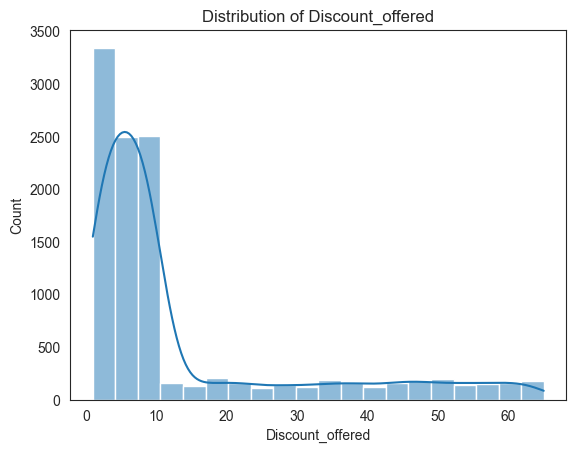

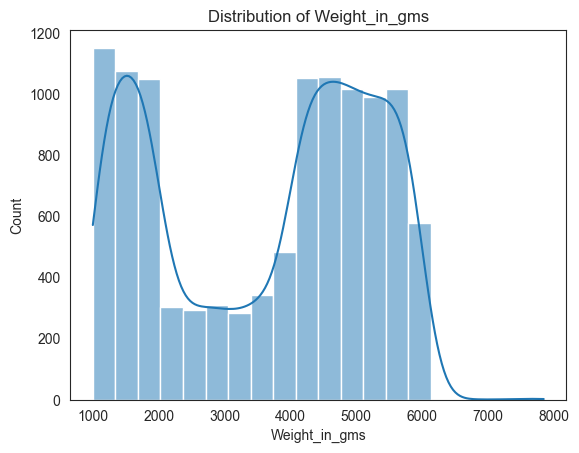

In [73]:
# Defining the List of Numerical Features to Visualize
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                     'Prior_purchases', 'Discount_offered', 
                     'Weight_in_gms']
# Looping Through Each Feature to Plot Histograms
for feature in numerical_features:
    
    #Plotting Histogram with KDE for Each Feature
    sns.histplot(df[feature], bins=20, kde=True)

    # Setting the Title for Each Plot
    plt.title(f'Distribution of {feature}')

    # Displaying the Plot
    plt.show()

# **BASIC DATA-ANALYSIS**

In [74]:
def bar_graph(df, column): 
    count_data = df.groupby([column, 'Reached.on.Time_Y.N']).size().unstack(fill_value=0)

    count_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 6))

    plt.xlabel(column)
    plt.ylabel('Count of Reached on Time')
    plt.title(f'Reached on Time vs Not Reached - {column}')
    plt.xticks(rotation=1)  # Rotate x-axis labels for better readability
    plt.legend(title='Reached on Time', labels=['Yes', 'No'])
    plt.show()

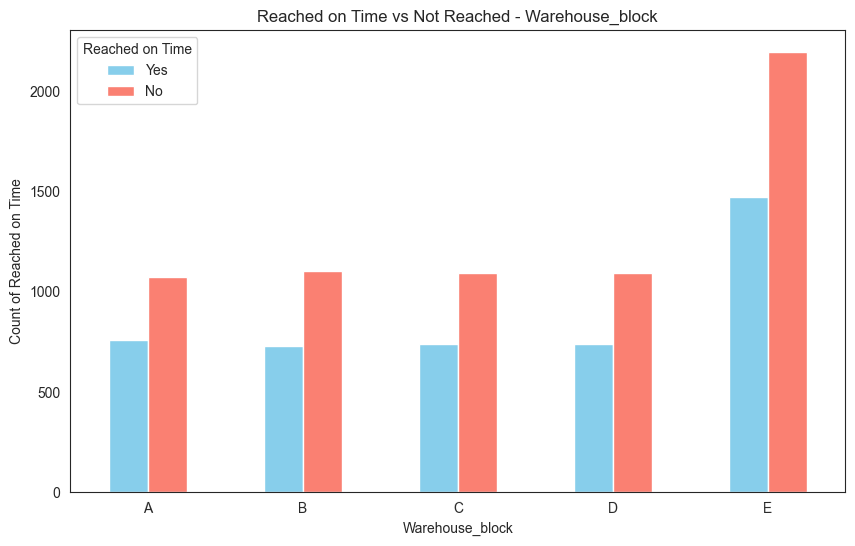

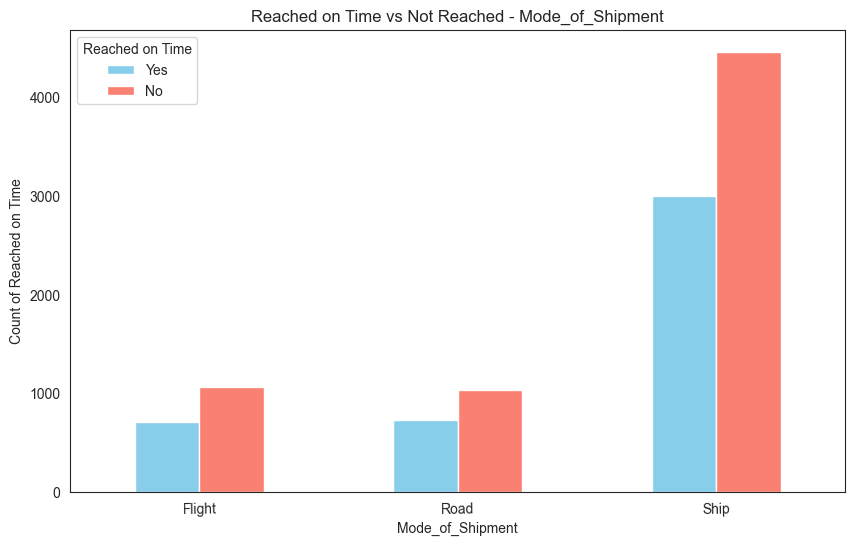

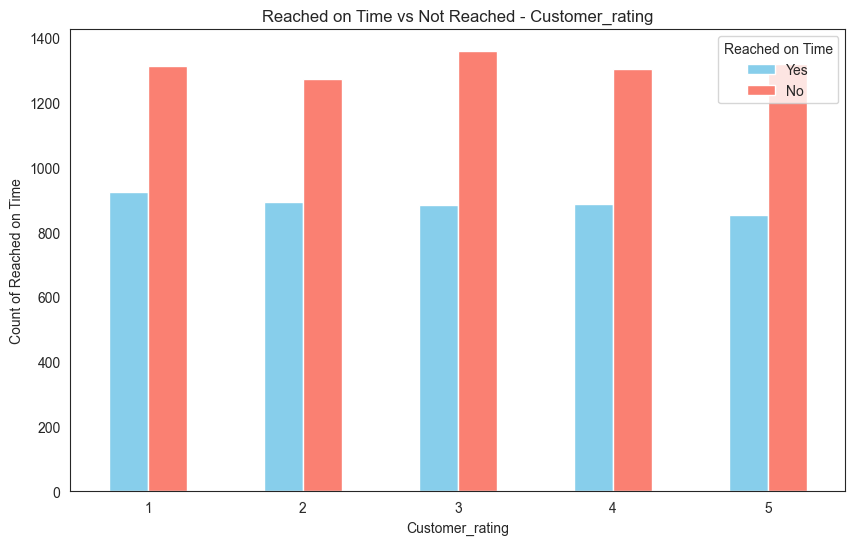

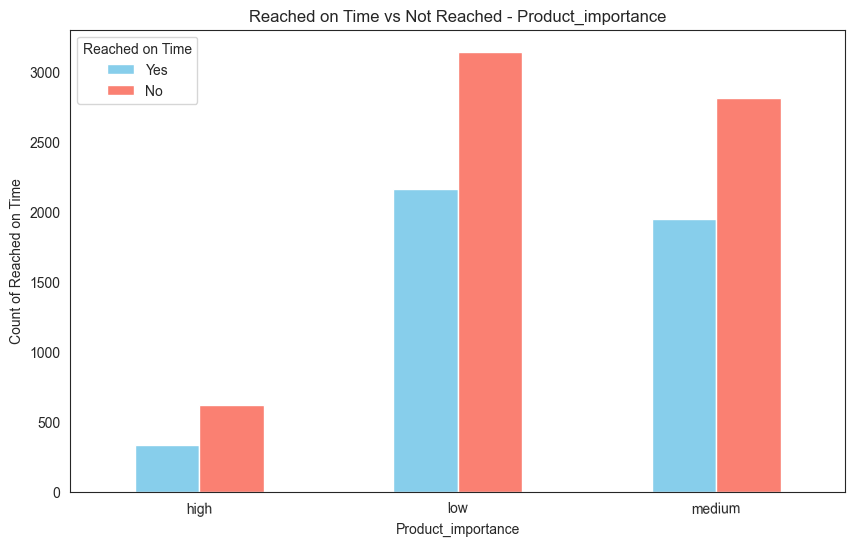

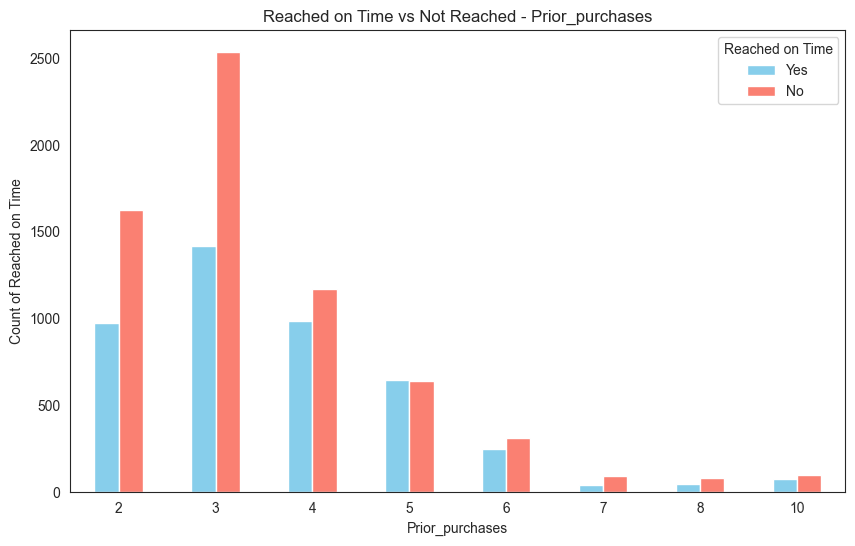

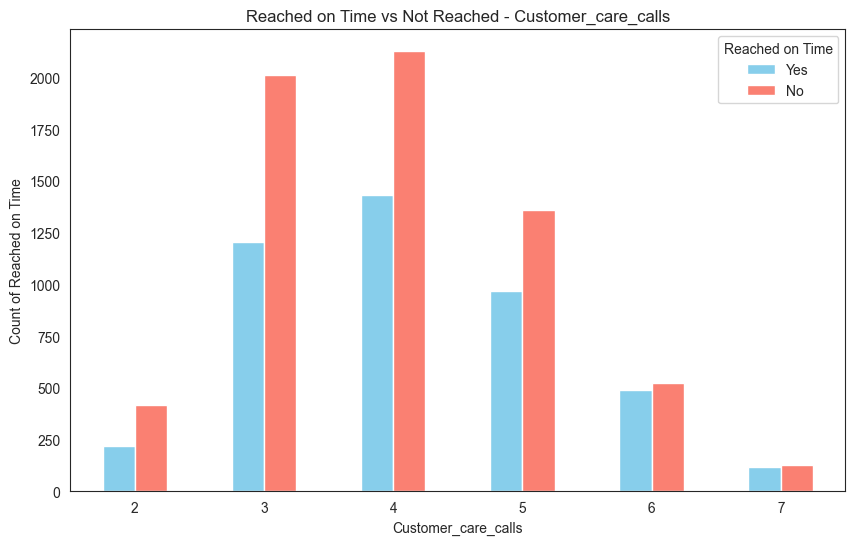

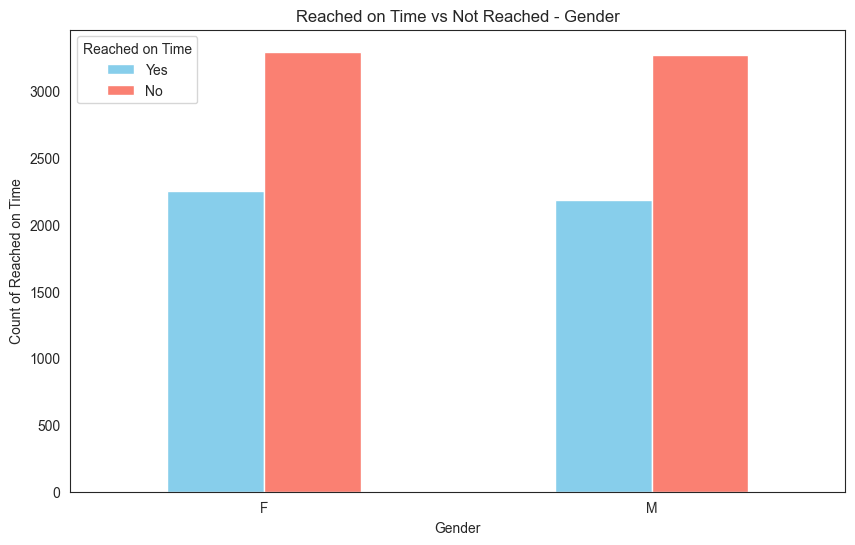

In [75]:
# Call the function for the specified column:-

bar_graph(df, 'Warehouse_block')
bar_graph(df, 'Mode_of_Shipment')
bar_graph(df, 'Customer_rating')
bar_graph(df, 'Product_importance')
bar_graph(df, 'Prior_purchases')
bar_graph(df, 'Customer_care_calls')
bar_graph(df, 'Gender')

`*` **Customer who had 6 or 7 times customer care calls has more delivery on time probability.**

`*` **Customer who had 4-6 times prior purchases has more delivery on time probability.**

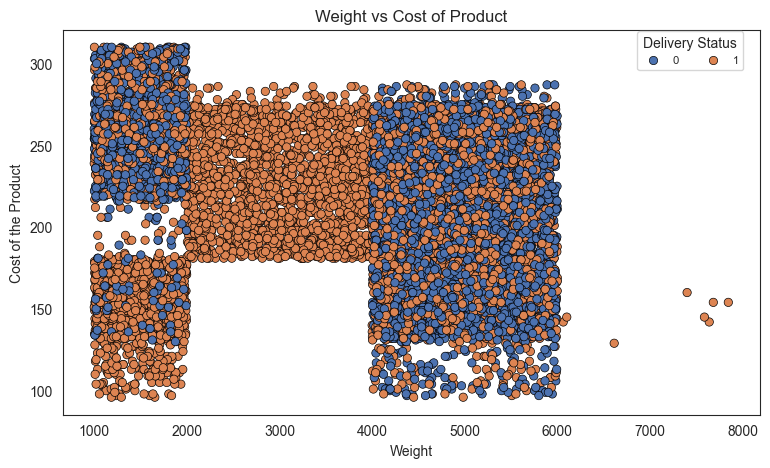

In [76]:
# Create a scatter plot
plt.figure(figsize=(9, 5))
sns.scatterplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=df,edgecolor='black',palette="deep")

# Set labels and title
plt.ylabel("Cost of the Product", fontsize=10)
plt.xlabel("Weight",fontsize=10)
plt.title("Weight vs Cost of Product", fontsize=12)

# Customize legend
plt.legend(title="Delivery Status",loc='upper center',bbox_to_anchor=(0.90, 1.01),ncol=2,fontsize=8)

# Show the plot
plt.show()


`*` **2000 - 4000 and 6000+ gram products are not delivered on time every time.**

`*` **Delivered on time products' weights changing between 1000-2000 and 4000-6000 grams.**

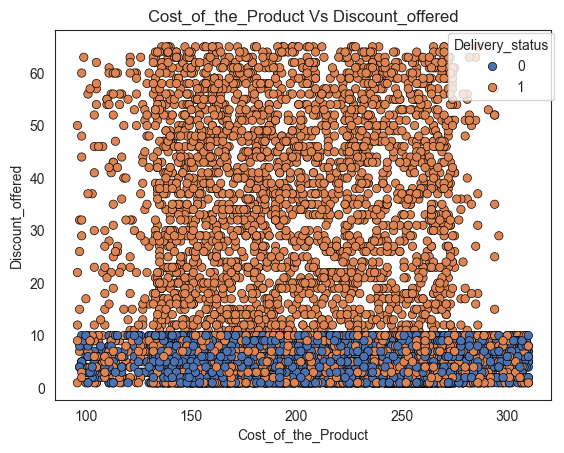

In [77]:
plt.figure()
sns.scatterplot(x='Cost_of_the_Product',y='Discount_offered',hue='Reached.on.Time_Y.N',data=df,edgecolor='black', palette='deep')

plt.xlabel('Cost_of_the_Product')
plt.ylabel('Discount_offered')
plt.title('Cost_of_the_Product Vs Discount_offered')

plt.legend(title= 'Delivery_status',loc= 'upper center',bbox_to_anchor=(0.90, 1.01),ncol=1)

plt.show()


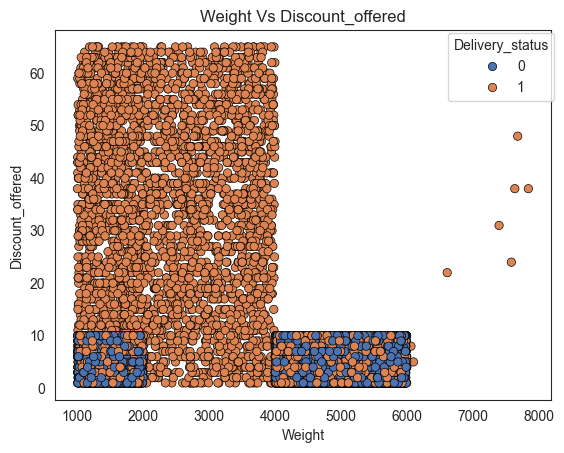

In [78]:
plt.figure()
sns.scatterplot(x="Weight_in_gms",y='Discount_offered',hue='Reached.on.Time_Y.N',data=df,edgecolor='black', palette='deep')

plt.xlabel("Weight",fontsize=10)
plt.ylabel('Discount_offered')
plt.title('Weight Vs Discount_offered')

plt.legend(title= 'Delivery_status',loc= 'upper center',bbox_to_anchor=(0.90, 1.01),ncol=1)

plt.show()

`*`**Customers who received a discount of more than 10 dollars did not receive on time delivery. This feature will be important for us to prediction.**

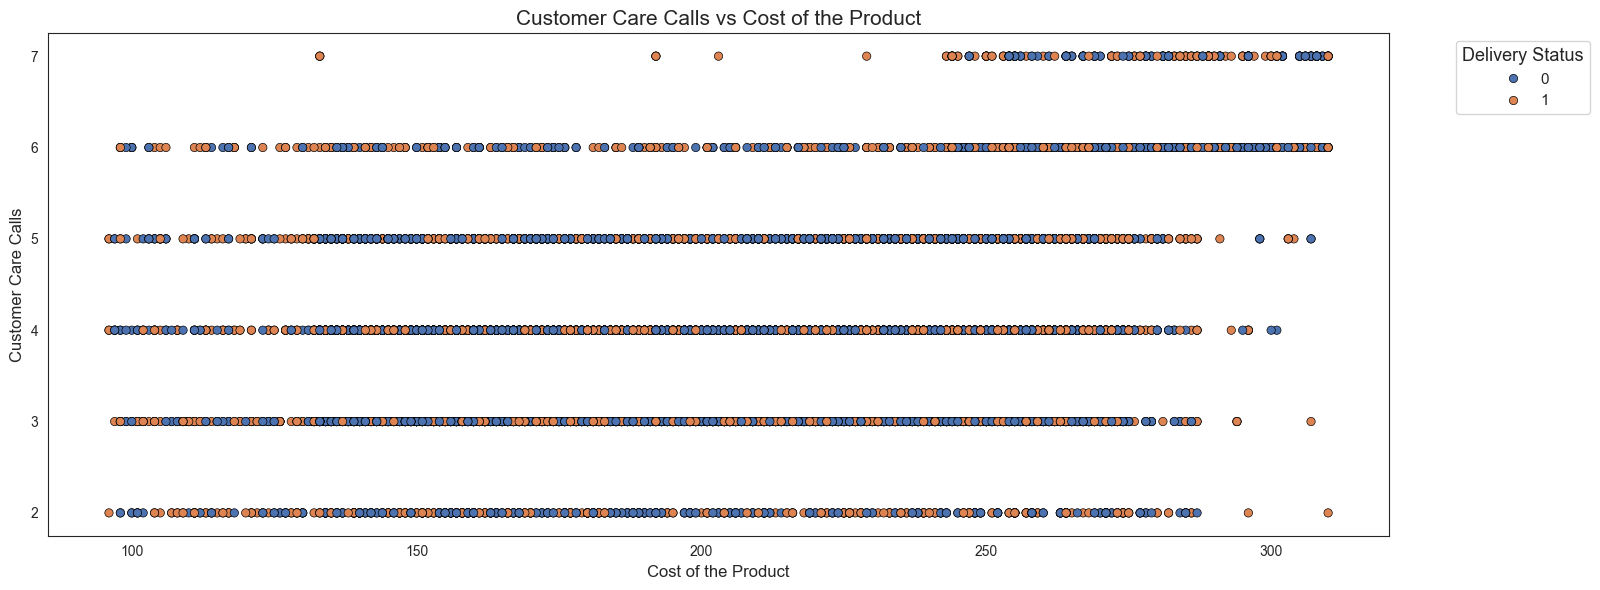

In [79]:
# Scatter Plot of Customer Care Calls vs Cost of Product, Colored by Delivery Status

plt.figure(figsize=(16, 6)) 
sns.scatterplot(
    x='Cost_of_the_Product',
    y='Customer_care_calls',
    hue='Reached.on.Time_Y.N',
    data=df,
    edgecolor='black',
    palette='deep'
)

# Labeling the axes and title
plt.xlabel('Cost of the Product', fontsize=12)
plt.ylabel('Customer Care Calls', fontsize=12)
plt.title('Customer Care Calls vs Cost of the Product', fontsize=15)

# Adjusting the legend
plt.legend(
    title='Delivery Status',
    loc='upper center',
    bbox_to_anchor=(1.1, 1),
    ncol=1,
    title_fontsize='13',
    fontsize='11'
)

plt.tight_layout()  # Ensures that all elements fit within the figure neatly
plt.show()


# **Visualising customer care calls effect on Average rating**

**Data Aggregation**

In [80]:
# Calculate the overall average rating
avg = df["Customer_rating"].mean()

# Initialize an empty list to store mean ratings for each call count
rate_mean = []

# Calculate mean ratings for customer care calls from 2 to 7
for i in range(2, 8):
    mean_rating = df[df["Customer_care_calls"] == i]["Customer_rating"].mean()
    rate_mean.append(float(mean_rating))


# Get unique values of Customer_care_calls sorted in ascending order
calls = df["Customer_care_calls"].sort_values(ascending=True).unique()

**Insights and Annotation**

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\2194724043.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




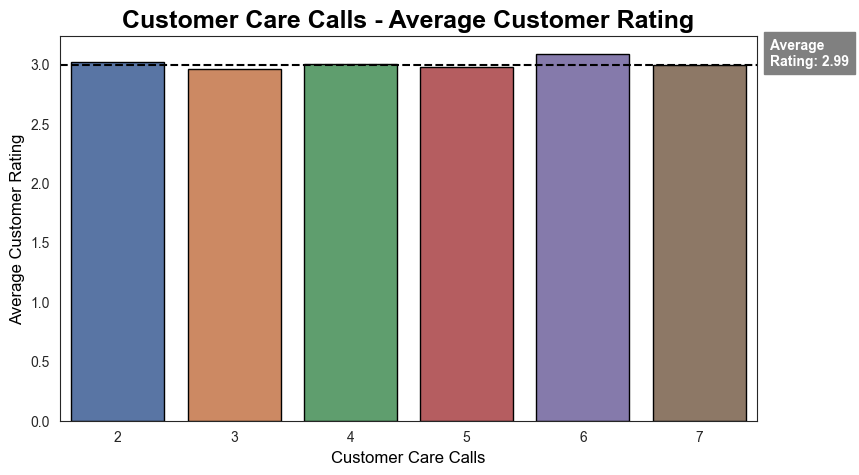

In [81]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=calls, y=rate_mean, edgecolor='black', palette="deep")

# Add a horizontal line for the overall average rating
ax.axhline(avg, linestyle='--', color="black")

# Annotate the average rating on the plot
xmin, xmax = ax.get_xlim()
ax.text(
    s="Average\nRating: {:.2f}".format(avg),
    x=xmax * 1.02,
    y=avg,
    backgroundcolor='gray',  
    fontsize=10,
    fontweight='bold',
    color='white'
)

# Set labels and title
plt.ylabel("Average Customer Rating", fontsize=12, fontweight='light', color='black')  
plt.xlabel("Customer Care Calls", fontsize=12, fontweight='light', color='black') 
plt.title("Customer Care Calls - Average Customer Rating", fontsize=18, fontweight='bold', color='black')  

# Show the plot
plt.show()

**There is no meaningful difference between them. As you can see, we are not getting better rating score if we call our customer more.**

# **DATA PRE-PROCESSING**

In [82]:
le = LabelEncoder()

# Encode the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [83]:
df.head(5)

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0                44           1233                    1  
1       1                59           3088                    1  
2       1                48           3374                    1  
3       1                10           1177                    1  
4       0                46           2484                    1

**Dropping Zero Corelated Features**

In [84]:
df_1= df.drop(columns=['ID','Gender'])

In [85]:
df_1.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# **CHECKING CORELATION BY HEAT-MAP**

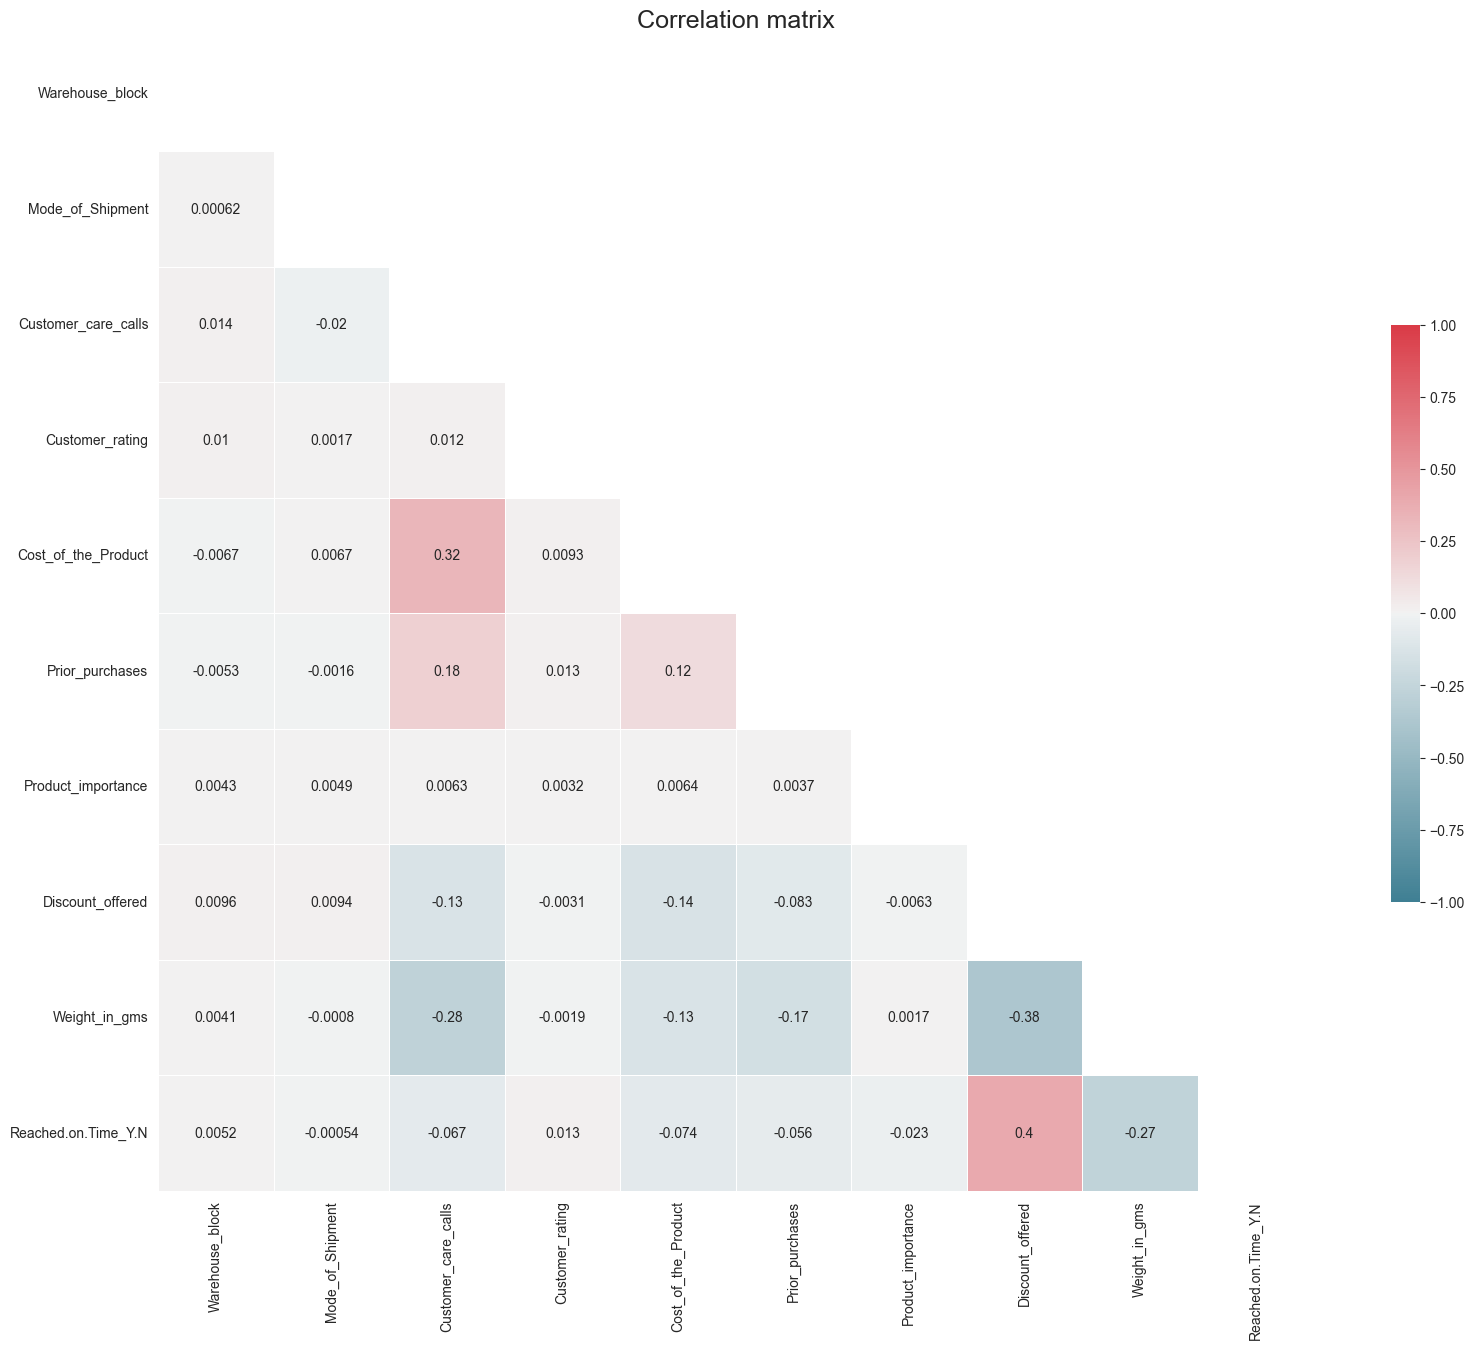

In [86]:
# Set the style of the visualization
sns.set_style('white')

# Compute the correlation matrix
corr= df_1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=np.bool_))

# Create a figure and axes object
f, ax = plt.subplots(figsize=(20,15))

# Define the color map
cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.title('Correlation matrix', fontsize= 18)

# Create the heatmap
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=1,vmin=-1,center= 0, square= True, linewidths=.5, cbar_kws={'shrink' : .5}, annot=True, ax=ax)

plt.show()

**`*`Customer_care_calls has a moderate positive correlation with Cost_of_the_Product, indicating that higher-cost products tend to have more customer service interactions.**

**`*`Discount_offered and Weight_in_gms have a moderate correlation, suggesting that heavier products are often given larger discounts.**

**`*`Overall, these relationships suggest that while there are some connections, the dataset does not have strong multicollinearity. Most features vary independently, which is often beneficial for machine learning models, as it can reduce the risk of overfitting due to redundant information.**

# **OUTLIER DETECTION**

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




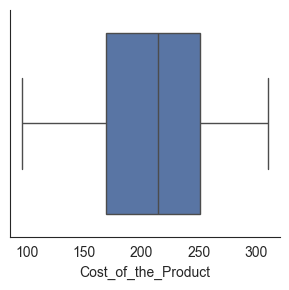

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




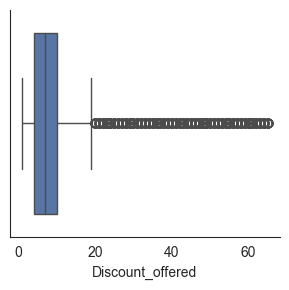

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




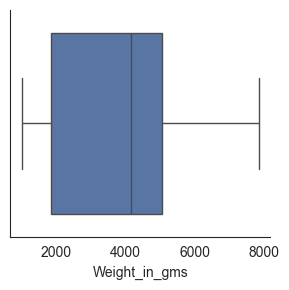

In [87]:
boxes = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]
for bx in boxes:
    g = sns.FacetGrid(df)
    g.map(sns.boxplot, bx,palette="deep")
    plt.show()

`*` **It seems like we have a lot of outliers for discount offered but we didn't see any outliers for other features, so it will not impact to accuracy hence we can proceed to spilit Train & Test data.**

# **SPLITING TRAIN AND TEST DATA**

In [88]:
# Split features and target variable
X = df_1.drop(columns=['Reached.on.Time_Y.N'])  
y = df_1['Reached.on.Time_Y.N']  


In [89]:
# Check for correlations
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

In [90]:
# Drop highly correlated features
X.drop(columns=high_corr_features, inplace=True)

In [91]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Purpose of Each Step**

`*` Ensures that the model is not affected by redundant information or scaling issues.

`*` Results in a cleaner, more interpretable, and effective dataset for modeling.

# **INITIALIZING THE MODELS**

`*`**RANDOM FOREST CLASSIFIER**

In [92]:
# Initialize Random Forest Classifier Model
rf_classifier_model = RandomForestClassifier()

# Defining Hyperparameter Grid for tuning RANDOM_FOREST
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf':[1,2,4]
}

In [93]:
# Use Stratified K-Fold for more robust cross-validation

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [94]:
# Set up GridSearchCV

grid_search = GridSearchCV(estimator=rf_classifier_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)


In [95]:
# from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2 ,random_state=42)

print(f"X_train: {len(y_train)} samples")
print(f"X_test: {len(y_test)} samples")

X_train: 8799 samples
X_test: 2200 samples


In [96]:
# Fit grid search on training data

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [97]:
# Get best parameters and accuracy

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [98]:
# Evaluate on test set

y_pred = best_model.predict(X_test)
print("\nRandom Forest Model Evaluation")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


Random Forest Model Evaluation
Test Accuracy: 0.6895454545454546
              precision    recall  f1-score   support

           0       0.58      0.87      0.69       895
           1       0.86      0.57      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.72      0.72      0.69      2200
weighted avg       0.75      0.69      0.69      2200

[[776 119]
 [564 741]]


# **XG-BOOST**

In [99]:
# Initialize XG-BOOST Classifier Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define Hyperparameter grids for Tuning XG_BOOST
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7, 1],
    'subsample': [0.5, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [100]:
# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid,
                                       n_iter=20, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)


In [101]:
# Fit RandomizedSearchCV on Training data
print("Tuning XGBoost model...")
xgb_random_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_random_search.best_params_)
print("Best accuracy for XGBoost:", xgb_random_search.best_score_)

Tuning XGBoost model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.7}
Best accuracy for XGBoost: 0.6834867598590749


C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning:

[15:35:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [102]:
# Predict and evaluate the best model from each tuning
xgb_best_model = xgb_random_search.best_estimator_

y_pred_xgb = xgb_best_model.predict(X_test)

print("\nXGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Model Evaluation
Accuracy: 0.6909090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.94      0.51      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200

Confusion_matrix:
 [[850  45]
 [635 670]]


# **OPTIMIZING LIGHT-GBM MODEL WITH RFE AND OPTUNA**

**Feature Selection with Recursive Feature Elimination (RFE)**

In [103]:
# Step 1: Feature Selection with RFE
lgbm_model = LGBMClassifier(random_state=42)

# Apply RFE to Select Top 9 Features
rfe = RFE(estimator=lgbm_model, n_features_to_select=9)
rfe.fit(X_train, y_train)

# Transform the Training and Test Sets to Include Only Selected Features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

[LightGBM] [Info] Number of positive: 5258, number of negative: 3541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initscore=0.395342
[LightGBM] [Info] Start training from score 0.395342


**Hyperparameter Tuning with Optuna on RFE-Selected Features**

In [104]:
# Step 2: Define Objective Function for Hyperparameter Tuning with Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', -1, 12),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 1.0)
    }

    # Initialize and Train LightGBM Classifier with Suggested Parameters
    model = LGBMClassifier(**param, random_state=42)
    model.fit(X_train_rfe, y_train)  # Train on RFE-selected features
    y_pred = model.predict(X_test_rfe)
    
    # Evaluate Model Performance Using F1 Score
    return f1_score(y_test, y_pred, average='weighted')

**Training the Final Model with Optimized Parameters from Optuna**

In [105]:
# Step 3: Create and Optimize the Optuna Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Display Best Parameters and Best F1 Score Achieved by Optuna
print("Best parameters found by Optuna:", study.best_params)
print("Best F1 score from Optuna:", study.best_value)

[I 2024-11-23 15:35:45,020] A new study created in memory with name: no-name-132ab1ca-199f-4e18-9160-5b09820a6d02


[LightGBM] [Warning] feature_fraction is set=0.6517259592722855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6517259592722855
[LightGBM] [Warning] lambda_l1 is set=0.0007261102496120235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007261102496120235
[LightGBM] [Warning] lambda_l2 is set=0.08519205073629059, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08519205073629059
[LightGBM] [Warning] bagging_fraction is set=0.7826778003250999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7826778003250999
[LightGBM] [Warning] feature_fraction is set=0.6517259592722855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6517259592722855
[LightGBM] [Warning] lambda_l1 is set=0.0007261102496120235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007261102496120235
[LightGBM] [Warning] lambda_l2 is set=0.08519205073629059, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0851920507362

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initscore=0.395342
[LightGBM] [Info] Start training from score 0.395342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-11-23 15:35:45,478] Trial 0 finished with value: 0.6745911899251539 and parameters: {'n_estimators': 956, 'learning_rate': 0.02291766616215327, 'num_leaves': 44, 'max_depth': 3, 'feature_fraction': 0.6517259592722855, 'bagging_fraction': 0.7826778003250999, 'lambda_l1': 0.0007261102496120235, 'lambda_l2': 0.08519205073629059, 'min_child_samples': 97, 'min_child_weight': 0.34879973822365334}. Best is trial 0 with value: 0.6745911899251539.


[LightGBM] [Warning] feature_fraction is set=0.6517259592722855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6517259592722855
[LightGBM] [Warning] lambda_l1 is set=0.0007261102496120235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007261102496120235
[LightGBM] [Warning] lambda_l2 is set=0.08519205073629059, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08519205073629059
[LightGBM] [Warning] bagging_fraction is set=0.7826778003250999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7826778003250999
[LightGBM] [Warning] feature_fraction is set=0.9973793325386489, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9973793325386489
[LightGBM] [Warning] lambda_l1 is set=8.782218580034718e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.782218580034718e-07
[LightGBM] [Warning] lambda_l2 is set=7.066761567318116e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.06676156731

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:45,841] Trial 1 finished with value: 0.6740683005324883 and parameters: {'n_estimators': 519, 'learning_rate': 0.014194027794872143, 'num_leaves': 61, 'max_depth': 6, 'feature_fraction': 0.9973793325386489, 'bagging_fraction': 0.5989081366301573, 'lambda_l1': 8.782218580034718e-07, 'lambda_l2': 7.066761567318116e-05, 'min_child_samples': 92, 'min_child_weight': 2.302236152071531e-08}. Best is trial 0 with value: 0.6745911899251539.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:46,128] Trial 2 finished with value: 0.6803175495365538 and parameters: {'n_estimators': 323, 'learning_rate': 0.013401400388513129, 'num_leaves': 43, 'max_depth': 0, 'feature_fraction': 0.6068390807398985, 'bagging_fraction': 0.9924188408756187, 'lambda_l1': 4.085877239613007, 'lambda_l2': 2.0233722038177866e-07, 'min_child_samples': 70, 'min_child_weight': 5.648454010952927e-05}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.6068390807398985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6068390807398985
[LightGBM] [Warning] lambda_l1 is set=4.085877239613007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.085877239613007
[LightGBM] [Warning] lambda_l2 is set=2.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:46,540] Trial 3 finished with value: 0.6706366378908892 and parameters: {'n_estimators': 747, 'learning_rate': 0.048345303980088, 'num_leaves': 95, 'max_depth': 5, 'feature_fraction': 0.6977226367779881, 'bagging_fraction': 0.9974205454774712, 'lambda_l1': 6.311695991437902e-05, 'lambda_l2': 5.715047665032451e-05, 'min_child_samples': 61, 'min_child_weight': 7.700962163715542e-07}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] feature_fraction is set=0.6412099870037539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6412099870037539
[LightGBM] [Warning] lambda_l1 is set=3.7404538245789904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7404538245789904
[LightGBM] [Warning] lambda_l2 is set=0.0003433524796292378, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003433524796292378
[LightGBM] [Warning] bagging_fraction is set=0.7116437752079481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7116437752079481
[LightGBM] [Warning] feature_fraction is set=0.6412099870037539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6412099870037539
[LightGBM] [Warning] lambda_l1 is set=3.7404538245789904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7404538245789904
[LightGBM] [Warning] lambda_l2 is set=0.0003433524796292378, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003433524796292378

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:47,179] Trial 4 finished with value: 0.6695814965769525 and parameters: {'n_estimators': 835, 'learning_rate': 0.009763429582062557, 'num_leaves': 89, 'max_depth': 6, 'feature_fraction': 0.6412099870037539, 'bagging_fraction': 0.7116437752079481, 'lambda_l1': 3.7404538245789904, 'lambda_l2': 0.0003433524796292378, 'min_child_samples': 65, 'min_child_weight': 0.024544962803996696}. Best is trial 2 with value: 0.6803175495365538.
C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:

[LightGBM] [Warning] feature_fraction is set=0.7983396485755896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983396485755896
[LightGBM] [Warning] lambda_l1 is set=1.675190596389306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.675190596389306e-05
[LightGBM] [Warning] lambda_l2 is set=0.0012969847090157026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012969847090157026
[LightGBM] [Warning] bagging_fraction is set=0.5846222142868296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5846222142868296
[LightGBM] [Warning] feature_fraction is set=0.7983396485755896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983396485755896
[LightGBM] [Warning] lambda_l1 is set=1.675190596389306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.675190596389306e-05
[LightGBM] [Warning] lambda_l2 is set=0.0012969847090157026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012969

[I 2024-11-23 15:35:47,761] Trial 6 finished with value: 0.6756901085869207 and parameters: {'n_estimators': 763, 'learning_rate': 0.11031387614532263, 'num_leaves': 37, 'max_depth': 5, 'feature_fraction': 0.9487541053136765, 'bagging_fraction': 0.9190303201085266, 'lambda_l1': 0.3280503322816462, 'lambda_l2': 8.628412833222399, 'min_child_samples': 38, 'min_child_weight': 2.8393403415385768e-06}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:48,088] Trial 7 finished with value: 0.675728453364817 and parameters: {'n_estimators': 522, 'learning_rate': 0.13669064074560425, 'num_leaves': 26, 'max_depth': 6, 'feature_fraction': 0.5614801863657626, 'bagging_fraction': 0.8695245298492047, 'lambda_l1': 1.7185495630176901, 'lambda_l2': 7.177504488717678, 'min_child_samples': 96, 'min_child_weight': 1.1030339351546534e-06}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] feature_fraction is set=0.5614801863657626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5614801863657626
[LightGBM] [Warning] lambda_l1 is set=1.7185495630176901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7185495630176901
[LightGBM] [Warning] lambda_l2 is set=7.177504488717678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.177504488717678
[LightGBM] [Warning] bagging_fraction is set=0.8695245298492047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8695245298492047
[LightGBM] [Warning] feature_fraction is set=0.8714718720351811, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8714718720351811
[LightGBM] [Warning] lambda_l1 is set=6.683384121471988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.683384121471988
[LightGBM] [Warning] lambda_l2 is set=2.557891212192301e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.557891212192301e-08
[LightGBM

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:48,778] Trial 9 finished with value: 0.6763118994826313 and parameters: {'n_estimators': 780, 'learning_rate': 0.01489646701017599, 'num_leaves': 37, 'max_depth': 5, 'feature_fraction': 0.6391988790061904, 'bagging_fraction': 0.9206328854242196, 'lambda_l1': 1.324616829569214e-07, 'lambda_l2': 5.501185713606044e-05, 'min_child_samples': 10, 'min_child_weight': 7.312842765102546e-07}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] feature_fraction is set=0.6391988790061904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6391988790061904
[LightGBM] [Warning] lambda_l1 is set=1.324616829569214e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.324616829569214e-07
[LightGBM] [Warning] lambda_l2 is set=5.501185713606044e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.501185713606044e-05
[LightGBM] [Warning] bagging_fraction is set=0.9206328854242196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9206328854242196
[LightGBM] [Warning] feature_fraction is set=0.5137554662042787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5137554662042787
[LightGBM] [Warning] lambda_l1 is set=0.012772412695528422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012772412695528422
[LightGBM] [Warning] lambda_l2 is set=1.0390697857255462e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.03906978

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.5229742700471419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5229742700471419
[LightGBM] [Warning] lambda_l1 is set=0.01494563614644484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01494563614644484
[LightGBM] [Warning] lambda_l2 is set=1.5090773691054377e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5090773691054377e-08
[LightGBM] [Warning] bagging_fraction is set=0.530407280494634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.530407280494634
[LightGBM] [Warning] feature_fraction is set=0.5017829612137295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017829612137295
[LightGBM] [Warning] lambda_l1 is set=0.019687007876637536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019687007876637536
[LightGBM] [Warning] lambda_l2 is set=4.963604176159293e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.9636041761592

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feat

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:50,043] Trial 13 finished with value: 0.6691046144842949 and parameters: {'n_estimators': 324, 'learning_rate': 0.036862613802439215, 'num_leaves': 77, 'max_depth': -1, 'feature_fraction': 0.568823541308108, 'bagging_fraction': 0.5118249488167443, 'lambda_l1': 0.03976210207593242, 'lambda_l2': 5.414245379535286e-07, 'min_child_samples': 78, 'min_child_weight': 0.00017859159210176928}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.568823541308108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.568823541308108
[LightGBM] [Warning] lambda_l1 is set=0.03976210207593242, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03976210207593242
[LightGBM] [Warning] lambda_l2 is set=5.414245379535286e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.414245379535286e-07
[LightGBM] [Warning] bagging_fraction is set=0.5118249488167443, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5118249488167443


C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.765601621936057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765601621936057
[LightGBM] [Warning] lambda_l1 is set=0.0014128109823787274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014128109823787274
[LightGBM] [Warning] lambda_l2 is set=3.35751510592832e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.35751510592832e-07
[LightGBM] [Warning] bagging_fraction is set=0.691888966177395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.691888966177395
[LightGBM] [Warning] feature_fraction is set=0.765601621936057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765601621936057
[LightGBM] [Warning] lambda_l1 is set=0.0014128109823787274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014128109823787274
[LightGBM] [Warning] lambda_l2 is set=3.35751510592832e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.35751510592832e-

[I 2024-11-23 15:35:50,441] Trial 14 finished with value: 0.6683652827686576 and parameters: {'n_estimators': 317, 'learning_rate': 0.07689043908436964, 'num_leaves': 52, 'max_depth': 9, 'feature_fraction': 0.765601621936057, 'bagging_fraction': 0.691888966177395, 'lambda_l1': 0.0014128109823787274, 'lambda_l2': 3.35751510592832e-07, 'min_child_samples': 47, 'min_child_weight': 1.8195148824074678e-05}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.765601621936057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765601621936057
[LightGBM] [Warning] lambda_l1 is set=0.0014128109823787274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014128109823787274
[LightGBM] [Warning] lambda_l2 is set=3.35751510592832e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.35751510592832e-07
[LightGBM] [Warning] bagging_fraction is set=0.691888966177395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.691888966177395


C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.5836572570938776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5836572570938776
[LightGBM] [Warning] lambda_l1 is set=0.10781674074074338, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10781674074074338
[LightGBM] [Warning] lambda_l2 is set=3.435457803586093e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.435457803586093e-06
[LightGBM] [Warning] bagging_fraction is set=0.9984722769113702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9984722769113702
[LightGBM] [Warning] feature_fraction is set=0.5836572570938776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5836572570938776
[LightGBM] [Warning] lambda_l1 is set=0.10781674074074338, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10781674074074338
[LightGBM] [Warning] lambda_l2 is set=3.435457803586093e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.435457803586093

[I 2024-11-23 15:35:51,005] Trial 15 finished with value: 0.6798034489782063 and parameters: {'n_estimators': 222, 'learning_rate': 0.026838311542374975, 'num_leaves': 71, 'max_depth': 10, 'feature_fraction': 0.5836572570938776, 'bagging_fraction': 0.9984722769113702, 'lambda_l1': 0.10781674074074338, 'lambda_l2': 3.435457803586093e-06, 'min_child_samples': 10, 'min_child_weight': 0.001547997376591492}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5836572570938776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5836572570938776
[LightGBM] [Warning] lambda_l1 is set=0.10781674074074338, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10781674074074338
[LightGBM] [Warning] lambda_l2 is set=3.435457803586093e-06, reg_lambda=0.0 will be ignored. Current value: lam

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:51,728] Trial 16 finished with value: 0.6589228427049993 and parameters: {'n_estimators': 446, 'learning_rate': 0.027167803957322368, 'num_leaves': 80, 'max_depth': 9, 'feature_fraction': 0.7116148784276211, 'bagging_fraction': 0.9888679901005553, 'lambda_l1': 0.20963593533534586, 'lambda_l2': 4.8266906727733935e-06, 'min_child_samples': 6, 'min_child_weight': 0.005977836680946744}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7116148784276211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7116148784276211
[LightGBM] [Warning] lambda_l1 is set=0.20963593533534586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20963593533534586
[LightGBM] [Warning] lambda_l2 is set=4.8266906727733935e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8266906727733935e-06
[LightGBM] [Warning] bagging_fraction is set=0.9888679901005553, subsample=1.0 will be ignored. Current value: bagging_

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.5845183341387188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5845183341387188
[LightGBM] [Warning] lambda_l1 is set=0.3819544884338973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3819544884338973
[LightGBM] [Warning] lambda_l2 is set=4.130479585159119e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130479585159119e-06
[LightGBM] [Warning] bagging_fraction is set=0.8536099565833788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8536099565833788
[LightGBM] [Warning] feature_fraction is set=0.5845183341387188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5845183341387188
[LightGBM] [Warning] lambda_l1 is set=0.3819544884338973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3819544884338973
[LightGBM] [Warning] lambda_l2 is set=4.130479585159119e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130479585159119e-06

[I 2024-11-23 15:35:52,086] Trial 17 finished with value: 0.6510276290733511 and parameters: {'n_estimators': 245, 'learning_rate': 0.005414522806780575, 'num_leaves': 56, 'max_depth': -1, 'feature_fraction': 0.5845183341387188, 'bagging_fraction': 0.8536099565833788, 'lambda_l1': 0.3819544884338973, 'lambda_l2': 4.130479585159119e-06, 'min_child_samples': 80, 'min_child_weight': 0.46502204381302836}. Best is trial 2 with value: 0.6803175495365538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5845183341387188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5845183341387188
[LightGBM] [Warning] lambda_l1 is set=0.3819544884338973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3819544884338973
[LightGBM] [Warning] lambda_l2 is set=4.130479585159119e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130479585159119e-06
[LightGBM] [Warning] bagging_fraction is set=0.8536099565833788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8536099565833788
[LightGBM] [Warning] feature_fraction is set=0.6054426425896582, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6054426425896582
[LightGBM] [Warning] lambda_l1 is set=7.4453439

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:52,645] Trial 18 finished with value: 0.6803662965689095 and parameters: {'n_estimators': 642, 'learning_rate': 0.019152983867260658, 'num_leaves': 34, 'max_depth': 8, 'feature_fraction': 0.6054426425896582, 'bagging_fraction': 0.9218648110428371, 'lambda_l1': 7.44534399679461, 'lambda_l2': 0.006875135776112901, 'min_child_samples': 22, 'min_child_weight': 0.00133388623693646}. Best is trial 18 with value: 0.6803662965689095.


[LightGBM] [Warning] feature_fraction is set=0.6054426425896582, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6054426425896582
[LightGBM] [Warning] lambda_l1 is set=7.44534399679461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.44534399679461
[LightGBM] [Warning] lambda_l2 is set=0.006875135776112901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006875135776112901
[LightGBM] [Warning] bagging_fraction is set=0.9218648110428371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9218648110428371
[LightGBM] [Warning] feature_fraction is set=0.6961842809627545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6961842809627545
[LightGBM] [Warning] lambda_l1 is set=8.49655762817888, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.49655762817888
[LightGBM] [Warning] lambda_l2 is set=0.00759121778445669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00759121778445669
[LightGBM] [W

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:53,356] Trial 19 finished with value: 0.6772411653735304 and parameters: {'n_estimators': 638, 'learning_rate': 0.0094717936744254, 'num_leaves': 30, 'max_depth': 8, 'feature_fraction': 0.6961842809627545, 'bagging_fraction': 0.9304723435188198, 'lambda_l1': 8.49655762817888, 'lambda_l2': 0.00759121778445669, 'min_child_samples': 20, 'min_child_weight': 2.868523441882968e-08}. Best is trial 18 with value: 0.6803662965689095.


[LightGBM] [Warning] feature_fraction is set=0.6961842809627545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6961842809627545
[LightGBM] [Warning] lambda_l1 is set=8.49655762817888, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.49655762817888
[LightGBM] [Warning] lambda_l2 is set=0.00759121778445669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00759121778445669
[LightGBM] [Warning] bagging_fraction is set=0.9304723435188198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9304723435188198
[LightGBM] [Warning] feature_fraction is set=0.8292540006049719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292540006049719
[LightGBM] [Warning] lambda_l1 is set=0.0035534556680453687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035534556680453687
[LightGBM] [Warning] lambda_l2 is set=0.1511286107513585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1511286107513585
[LightG

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:11: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:54,412] Trial 23 finished with value: 0.6835665195381759 and parameters: {'n_estimators': 644, 'learning_rate': 0.009327593265772753, 'num_leaves': 51, 'max_depth': 2, 'feature_fraction': 0.8504558438844074, 'bagging_fraction': 0.8349112389889695, 'lambda_l1': 1.3190969450346454e-08, 'lambda_l2': 0.5589561170768541, 'min_child_samples': 58, 'min_child_weight': 3.203448884066833e-06}. Best is trial 20 with value: 0.6854879641724203.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.9144997103302378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9144997103302378
[LightGBM] [Warning] lambda_l1 is set=1.9888169111386058e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9888169111386058e-05
[LightGBM] [Warning] lambda_l2 is set=0.020062655587131654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020062655587131654
[LightGBM] [Warning] bagging_fraction is set=0.748849842461436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.748849842461436
[LightGBM] [Info] Number of positive: 5258, number of negative: 3541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597568 -> initsco

[I 2024-11-23 15:35:55,242] Trial 26 finished with value: 0.6848959174796495 and parameters: {'n_estimators': 694, 'learning_rate': 0.03246049779291089, 'num_leaves': 55, 'max_depth': 1, 'feature_fraction': 0.9144997103302378, 'bagging_fraction': 0.748849842461436, 'lambda_l1': 1.9888169111386058e-05, 'lambda_l2': 0.020062655587131654, 'min_child_samples': 54, 'min_child_weight': 1.732641024235423e-07}. Best is trial 20 with value: 0.6854879641724203.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.9189920130783907, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9189920130783907
[LightGBM] [Warning] lambda_l1 is set=5.3294963387381116e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3294963387381116e-05
[LightGBM] [Warning] lambda_l2 is set=0.025369108175979534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025369108175979534
[LightGBM] [Warning] bagging_fraction is set=0.7387335167543565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7387335167543565
[LightGBM] [Warning] feature_fraction is set=0.9007383868645878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9007383868645878
[LightGBM] [Warning] lambda_l1 is set=0.003037731854848182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003037731854848182
[LightGBM] [Warning] lambda_l2 is set=0.024795221623618878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0247952216

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:35:56,745] Trial 29 finished with value: 0.6702516002551173 and parameters: {'n_estimators': 985, 'learning_rate': 0.02459049378662889, 'num_leaves': 43, 'max_depth': 3, 'feature_fraction': 0.7974957020920538, 'bagging_fraction': 0.6724398396944594, 'lambda_l1': 0.00031193323902022963, 'lambda_l2': 0.9475267203687268, 'min_child_samples': 85, 'min_child_weight': 3.340872643521184e-07}. Best is trial 20 with value: 0.6854879641724203.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.9725392358137952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9725392358137952
[LightGBM] [Warning] lambda_l1 is set=7.887194116783351e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.887194116783351e-06
[LightGBM] [Warning] lambda_l2 is set=1.4992498511583008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4992498511583008
[LightGBM] [Warning] bagging_fraction is set=0.7571595786421255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7571595786421255
[LightGBM] [Warning] feature_fraction is set=0.9725392358137952, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9725392358137952
[LightGBM] [Warning] lambda_l1 is set=7.887194116783351e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.887194116783351e-06
[LightGBM] [Warning] lambda_l2 is set=1.4992498511583008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4992498511583008

[I 2024-11-23 15:35:57,311] Trial 30 finished with value: 0.6615338787389599 and parameters: {'n_estimators': 899, 'learning_rate': 0.06916205410977615, 'num_leaves': 40, 'max_depth': 4, 'feature_fraction': 0.9725392358137952, 'bagging_fraction': 0.7571595786421255, 'lambda_l1': 7.887194116783351e-06, 'lambda_l2': 1.4992498511583008, 'min_child_samples': 67, 'min_child_weight': 3.7050407654296156e-06}. Best is trial 20 with value: 0.6854879641724203.
C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.


[LightGBM] [Warning] feature_fraction is set=0.7924474415856846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7924474415856846
[LightGBM] [Warning] lambda_l1 is set=2.6227445288239607e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6227445288239607e-06
[LightGBM] [Warning] lambda_l2 is set=0.06110734573161905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06110734573161905
[LightGBM] [Warning] bagging_fraction is set=0.8102857234649823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8102857234649823
[LightGBM] [Warning] feature_fraction is set=0.7924474415856846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7924474415856846
[LightGBM] [Warning] lambda_l1 is set=2.6227445288239607e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6227445288239607e-06
[LightGBM] [Warning] lambda_l2 is set=0.06110734573161905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.061107345

[I 2024-11-23 15:35:57,595] Trial 31 finished with value: 0.6786125504456081 and parameters: {'n_estimators': 715, 'learning_rate': 0.033345199931016804, 'num_leaves': 53, 'max_depth': 2, 'feature_fraction': 0.7924474415856846, 'bagging_fraction': 0.8102857234649823, 'lambda_l1': 2.6227445288239607e-06, 'lambda_l2': 0.06110734573161905, 'min_child_samples': 56, 'min_child_weight': 1.0075527265670472e-05}. Best is trial 20 with value: 0.6854879641724203.
C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instea

[LightGBM] [Warning] feature_fraction is set=0.9088809159323317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9088809159323317
[LightGBM] [Warning] lambda_l1 is set=0.00022871578496776147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022871578496776147
[LightGBM] [Warning] lambda_l2 is set=0.002672649047867656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002672649047867656
[LightGBM] [Warning] bagging_fraction is set=0.7273298999717629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7273298999717629
[LightGBM] [Warning] feature_fraction is set=0.9088809159323317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9088809159323317
[LightGBM] [Warning] lambda_l1 is set=0.00022871578496776147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022871578496776147
[LightGBM] [Warning] lambda_l2 is set=0.002672649047867656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002672

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.8975516343553687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8975516343553687
[LightGBM] [Warning] lambda_l1 is set=0.0003112539832498534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003112539832498534
[LightGBM] [Warning] lambda_l2 is set=0.003991899386076981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003991899386076981
[LightGBM] [Warning] bagging_fraction is set=0.7180457520835944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180457520835944
[LightGBM] [Warning] feature_fraction is set=0.8975516343553687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8975516343553687
[LightGBM] [Warning] lambda_l1 is set=0.0003112539832498534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003112539832498534
[LightGBM] [Warning] lambda_l2 is set=0.003991899386076981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0039918993

[I 2024-11-23 15:35:58,678] Trial 33 finished with value: 0.6709745703959455 and parameters: {'n_estimators': 570, 'learning_rate': 0.012736178364643596, 'num_leaves': 47, 'max_depth': 0, 'feature_fraction': 0.8975516343553687, 'bagging_fraction': 0.7180457520835944, 'lambda_l1': 0.0003112539832498534, 'lambda_l2': 0.003991899386076981, 'min_child_samples': 72, 'min_child_weight': 1.9976287663810845e-08}. Best is trial 32 with value: 0.6874184466967972.


[LightGBM] [Warning] feature_fraction is set=0.8975516343553687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8975516343553687
[LightGBM] [Warning] lambda_l1 is set=0.0003112539832498534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003112539832498534
[LightGBM] [Warning] lambda_l2 is set=0.003991899386076981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003991899386076981
[LightGBM] [Warning] bagging_fraction is set=0.7180457520835944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7180457520835944
[LightGBM] [Warning] feature_fraction is set=0.9371054481660321, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9371054481660321
[LightGBM] [Warning] lambda_l1 is set=9.471025074568795e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.471025074568795e-05
[LightGBM] [Warning] lambda_l2 is set=0.046822987192581746, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0468229871

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.9760376217428819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9760376217428819
[LightGBM] [Warning] lambda_l1 is set=0.004464119178448906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004464119178448906
[LightGBM] [Warning] lambda_l2 is set=0.00046544406945170873, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00046544406945170873
[LightGBM] [Warning] bagging_fraction is set=0.7733944065633016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7733944065633016
[LightGBM] [Warning] feature_fraction is set=0.8167123146434773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8167123146434773
[LightGBM] [Warning] lambda_l1 is set=2.1119619640113002e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1119619640113002e-05
[LightGBM] [Warning] lambda_l2 is set=0.0014428734277875848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00144

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.7742734618284369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7742734618284369
[LightGBM] [Warning] lambda_l1 is set=0.0006917560427207632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006917560427207632
[LightGBM] [Warning] lambda_l2 is set=0.013835084389055926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013835084389055926
[LightGBM] [Warning] bagging_fraction is set=0.6901274660501396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6901274660501396
[LightGBM] [Warning] feature_fraction is set=0.7742734618284369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7742734618284369
[LightGBM] [Warning] lambda_l1 is set=0.0006917560427207632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006917560427207632
[LightGBM] [Warning] lambda_l2 is set=0.013835084389055926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0138350843

[I 2024-11-23 15:36:00,527] Trial 37 finished with value: 0.6882214892169886 and parameters: {'n_estimators': 495, 'learning_rate': 0.011858829563343238, 'num_leaves': 47, 'max_depth': 4, 'feature_fraction': 0.7742734618284369, 'bagging_fraction': 0.6901274660501396, 'lambda_l1': 0.0006917560427207632, 'lambda_l2': 0.013835084389055926, 'min_child_samples': 50, 'min_child_weight': 1.8382918210440427e-06}. Best is trial 37 with value: 0.6882214892169886.
C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instea

[LightGBM] [Warning] feature_fraction is set=0.7415594333584988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7415594333584988
[LightGBM] [Warning] lambda_l1 is set=0.0011717346848725428, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011717346848725428
[LightGBM] [Warning] lambda_l2 is set=2.2649921447483172, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2649921447483172
[LightGBM] [Warning] bagging_fraction is set=0.6896841434760481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896841434760481
[LightGBM] [Warning] feature_fraction is set=0.7415594333584988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7415594333584988
[LightGBM] [Warning] lambda_l1 is set=0.0011717346848725428, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011717346848725428
[LightGBM] [Warning] lambda_l2 is set=2.2649921447483172, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2649921447483172

[I 2024-11-23 15:36:00,879] Trial 38 finished with value: 0.6854957081509088 and parameters: {'n_estimators': 502, 'learning_rate': 0.011871056376040556, 'num_leaves': 34, 'max_depth': 4, 'feature_fraction': 0.7415594333584988, 'bagging_fraction': 0.6896841434760481, 'lambda_l1': 0.0011717346848725428, 'lambda_l2': 2.2649921447483172, 'min_child_samples': 63, 'min_child_weight': 1.483465733564032e-06}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7415594333584988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7415594333584988
[LightGBM] [Warning] lambda_l1 is set=0.0011717346848725428, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011717346848725428
[LightGBM] [Warning] lambda_l2 is set=2.2649921447483172, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2649921447483172
[LightGBM] [Warning] bagging_fraction is set=0.6896841434760481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896841434760481
[LightGBM] [Warning] feature_fraction is set=0.7440369833716529, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7440369833716529
[LightGBM] [Warning] lambda_l1 is set=0.0007332262441272762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:36:01,511] Trial 40 finished with value: 0.6876408136557404 and parameters: {'n_estimators': 505, 'learning_rate': 0.007423777967292, 'num_leaves': 31, 'max_depth': 4, 'feature_fraction': 0.7493313773551603, 'bagging_fraction': 0.5806130572373591, 'lambda_l1': 0.0009525348806909399, 'lambda_l2': 2.9923147105636985, 'min_child_samples': 71, 'min_child_weight': 1.7028933469955325e-06}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:36:02,272] Trial 42 finished with value: 0.6794609694018199 and parameters: {'n_estimators': 391, 'learning_rate': 0.007118478526561978, 'num_leaves': 21, 'max_depth': 5, 'feature_fraction': 0.7400875217263241, 'bagging_fraction': 0.5742550180418744, 'lambda_l1': 0.0005556897234071617, 'lambda_l2': 4.47586189575727, 'min_child_samples': 70, 'min_child_weight': 2.4926689034913145e-06}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.6698750040938513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6698750040938513
[LightGBM] [Warning] lambda_l1 is set=0.00012917622291569057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012917622291569057
[LightGBM] [Warning] lambda_l2 is set=4.172695762997339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.172695762997339
[LightGBM] [Warning] bagging_fraction is set=0.6197956420231568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6197956420231568
[LightGBM] [Warning] feature_fraction is set=0.6698750040938513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6698750040938513
[LightGBM] [Warning] lambda_l1 is set=0.00012917622291569057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012917622291569057
[LightGBM] [Warning] lambda_l2 is set=4.172695762997339, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.172695762997339

[I 2024-11-23 15:36:02,728] Trial 43 finished with value: 0.6716413019985217 and parameters: {'n_estimators': 496, 'learning_rate': 0.007143675191419268, 'num_leaves': 26, 'max_depth': 6, 'feature_fraction': 0.6698750040938513, 'bagging_fraction': 0.6197956420231568, 'lambda_l1': 0.00012917622291569057, 'lambda_l2': 4.172695762997339, 'min_child_samples': 75, 'min_child_weight': 1.2115569369191479e-06}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.7748989646198228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7748989646198228
[LightGBM] [Warning] lambda_l1 is set=0.00020251802069313726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020251802069313726
[LightGBM] [Warning] lambda_l2 is set=0.00010507681374538776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010507681374538776
[LightGBM] [Warning] bagging_fraction is set=0.5611459825731699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5611459825731699
[LightGBM] [Warning] feature_fraction is set=0.7748989646198228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7748989646198228
[LightGBM] [Warning] lambda_l1 is set=0.00020251802069313726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020251802069313726
[LightGBM] [Warning] lambda_l2 is set=0.00010507681374538776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.

[I 2024-11-23 15:36:03,123] Trial 44 finished with value: 0.6881688126843414 and parameters: {'n_estimators': 547, 'learning_rate': 0.007390563333640171, 'num_leaves': 29, 'max_depth': 4, 'feature_fraction': 0.7748989646198228, 'bagging_fraction': 0.5611459825731699, 'lambda_l1': 0.00020251802069313726, 'lambda_l2': 0.00010507681374538776, 'min_child_samples': 84, 'min_child_weight': 2.7413610736907163e-05}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:36:03,528] Trial 45 finished with value: 0.677106294780104 and parameters: {'n_estimators': 368, 'learning_rate': 0.010786033485397965, 'num_leaves': 27, 'max_depth': 7, 'feature_fraction': 0.7704230878121717, 'bagging_fraction': 0.5581139218181956, 'lambda_l1': 0.00012772887845211844, 'lambda_l2': 8.128373761669982e-05, 'min_child_samples': 88, 'min_child_weight': 3.223435750165382e-05}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:36:03,978] Trial 46 finished with value: 0.6763757213973438 and parameters: {'n_estimators': 589, 'learning_rate': 0.008222612194520217, 'num_leaves': 20, 'max_depth': 5, 'feature_fraction': 0.7139422925746335, 'bagging_fraction': 0.6123249301316339, 'lambda_l1': 0.00708393534824862, 'lambda_l2': 0.00017684421593660928, 'min_child_samples': 97, 'min_child_weight': 0.00010329628670315482}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-11-23 15:36:04,394] Trial 47 finished with value: 0.6844958395982694 and parameters: {'n_estimators': 542, 'learning_rate': 0.006531952573241534, 'num_leaves': 37, 'max_depth': 3, 'feature_fraction': 0.6603885964373987, 'bagging_fraction': 0.5615440432448376, 'lambda_l1': 0.0017062576936434787, 'lambda_l2': 0.001081284227541721, 'min_child_samples': 90, 'min_child_weight': 5.31485044144741e-08}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:8: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:9: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\Sandeep Sarkar\AppData\Local\Temp\ipykernel_15532\353495702.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

[LightGBM] [Warning] feature_fraction is set=0.7713553618027734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7713553618027734
[LightGBM] [Warning] lambda_l1 is set=0.033299888616753995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033299888616753995
[LightGBM] [Warning] lambda_l2 is set=1.6340540364048215e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6340540364048215e-05
[LightGBM] [Warning] bagging_fraction is set=0.6625280755994888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6625280755994888
[LightGBM] [Warning] feature_fraction is set=0.7713553618027734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7713553618027734
[LightGBM] [Warning] lambda_l1 is set=0.033299888616753995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033299888616753995
[LightGBM] [Warning] lambda_l2 is set=1.6340540364048215e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.63405403

[I 2024-11-23 15:36:05,058] Trial 49 finished with value: 0.6787978674546993 and parameters: {'n_estimators': 379, 'learning_rate': 0.00502832225649275, 'num_leaves': 24, 'max_depth': 6, 'feature_fraction': 0.7713553618027734, 'bagging_fraction': 0.6625280755994888, 'lambda_l1': 0.033299888616753995, 'lambda_l2': 1.6340540364048215e-05, 'min_child_samples': 80, 'min_child_weight': 0.02385643054864049}. Best is trial 37 with value: 0.6882214892169886.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.7713553618027734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7713553618027734
[LightGBM] [Warning] lambda_l1 is set=0.033299888616753995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033299888616753995
[LightGBM] [Warning] lambda_l2 is set=1.6340540364048215e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6340540364048215e-05
[LightGBM] [Warning] bagging_fraction is set=0.6625280755994888, subsample=1.0 will be ignored. Current value: baggin

**Train and Evaluate Final Model Using Optuna-Optimized Parameters**

In [106]:
# Step 4: Train Final LightGBM Model Using Optimized Parameters from Optuna

best_params = study.best_params
final_model = LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train_rfe, y_train)
y_pred_final = final_model.predict(X_test_rfe)



[LightGBM] [Warning] feature_fraction is set=0.7742734618284369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7742734618284369
[LightGBM] [Warning] lambda_l1 is set=0.0006917560427207632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006917560427207632
[LightGBM] [Warning] lambda_l2 is set=0.013835084389055926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013835084389055926
[LightGBM] [Warning] bagging_fraction is set=0.6901274660501396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6901274660501396
[LightGBM] [Warning] feature_fraction is set=0.7742734618284369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7742734618284369
[LightGBM] [Warning] lambda_l1 is set=0.0006917560427207632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006917560427207632
[LightGBM] [Warning] lambda_l2 is set=0.013835084389055926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0138350843

In [107]:
# Evaluate Final Model Performance on Test Set
print("\nFinal LightGBM Model Evaluation with Optimized Parameters")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


Final LightGBM Model Evaluation with Optimized Parameters
Accuracy: 0.6913636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.90      0.70       895
           1       0.89      0.55      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.69      2200

Confusion Matrix:
 [[809  86]
 [593 712]]


**Additional Hyperparameter Tuning with RandomizedSearchCV on RFE-Selected Features**

In [108]:
# Step 5: Hyperparameter Tuning with RandomizedSearchCV on RFE-Selected Features
lgbm_param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [3, 6, 9, 12, -1],
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 50, 100],
    'feature_fraction': [0.5, 0.6, 0.8, 1.0],
    'bagging_fraction': [0.05, 0.6, 0.8, 1.0],
    'min_child_weight': [0.001, 0.01, 0.1],  # Regularization for leaf nodes
    'lambda_l1': [0, 1, 5],
    'lambda_l2': [0, 1, 5]
}

# Setup RandomizedSearchCV
lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=lgbm_param_grid,
    n_iter=20, 
    scoring='accuracy', 
    cv=5, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1
)

In [109]:
# Fit RandomizedSearchCV on RFE-selected features
print("Tuning LightGBM model with RFE-selected features...")
lgbm_random_search.fit(X_train_rfe, y_train)

print("Best parameters for LightGBM:", lgbm_random_search.best_params_)
print("Best accuracy for LightGBM:", lgbm_random_search.best_score_)

# Predict and evaluate the best model from RandomizedSearchCV
lgbm_best_model = lgbm_random_search.best_estimator_

y_pred_lgbm = lgbm_best_model.predict(X_test_rfe)

Tuning LightGBM model with RFE-selected features...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[Light

In [110]:
# Evaluate the tuned model's performance

print("\nLightGBM Model Evaluation (with hyperparameter tuning and RFE-selected features)")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


LightGBM Model Evaluation (with hyperparameter tuning and RFE-selected features)
Accuracy: 0.6931818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.95      0.72       895
           1       0.94      0.52      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.69      2200

Confusion Matrix:
 [[850  45]
 [630 675]]


# **STACKING ENSEMBLE**

**We will fit the stacking model without tuning Random Forest first, then run RandomizedSearchCV on the stacking ensemble using Random Forest as the final estimator.**

In [111]:
# Define the hyperparameter grid for tuning Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [112]:
# Define Base Models for Stacking (XGBoost and LightGBM with Best Parameters)

base_models = [
    ('xgb', XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                          use_label_encoder=False, eval_metric='logloss', random_state=42,
                          **xgb_random_search.best_params_)),
    ('lgbm', LGBMClassifier(class_weight={0:1 , 1:1.5}, random_state=42,
                            **lgbm_random_search.best_params_))
]

In [113]:
# Define Stacking Model with Random Forest as the Meta-Classifier

stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42),
    cv=5,
    n_jobs=-1
)

In [114]:
# Set Up RandomizedSearchCV for Hyperparameter Tuning of the Stacking Model's Final Estimator (Random Forest)

random_search_rf = RandomizedSearchCV(
    estimator=stacked_model,
    param_distributions={'final_estimator__' + key: value for key, value in rf_param_grid.items()},
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [115]:
# Tuning Stacking Ensemble with Random Forest as Final Estimator

print("Tuning Stacking Ensemble with Random Forest as Final Estimator...")
random_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest as Final Estimator:", random_search_rf.best_params_)
print("Best accuracy for Stacking Model with Tuned Random Forest:", random_search_rf.best_score_)

Tuning Stacking Ensemble with Random Forest as Final Estimator...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandeep Sarkar\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_stacking.py", line 672, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\San

Best parameters for Random Forest as Final Estimator: {'final_estimator__n_estimators': 100, 'final_estimator__min_samples_split': 2, 'final_estimator__min_samples_leaf': 4, 'final_estimator__max_features': 'sqrt', 'final_estimator__max_depth': 10}
Best accuracy for Stacking Model with Tuned Random Forest: 0.6795103106103675


In [116]:
# Evaluate the Tuned Stacking Model on Test Set

y_pred_stacked_tuned = random_search_rf.best_estimator_.predict(X_test)
print("\nStacking Model Evaluation with Tuned Random Forest as Meta-Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stacked_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_stacked_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked_tuned))

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8

Stacking Model Evaluation with Tuned Random Forest as Meta-Classifier
Accuracy: 0.6954545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.95      0.72       895
           1       0.94      0.52      0.67      1305

    accuracy                           0.70      2200
   macro avg       0.76      0.74      0.69      2200
weighted avg       0.79      0.70      0.69      2200

Confusion Matrix:
 [[851  44]
 [626 679]]
